In [1]:
import os

In [2]:
#to get the file path in notebooks
# __file__ path no work in Jupiter note
#https://stackoverflow.com/questions/39125532/file-does-not-exist-in-jupyter-notebook
current_dir=os.path.abspath('')

Load dataset

In [3]:
# download the tiny shakespeare dataset
sufix="4maps"
folder=f"microstate_{sufix}_2sE_dataset_pretokenize"
input_file_path = os.path.join(os.path.dirname(current_dir), f"data/{folder}/output_{sufix}_2sE.train.txt")
print(input_file_path)

/home/rjarpa/code/nanoGPT/data/microstate_4maps_2sE_dataset_pretokenize/output_4maps_2sE.train.txt


In [4]:
# Read the text file and store each line as an element in a list
def read_text_file_to_list(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        lines = [line.strip() for line in lines]
    return lines


In [5]:
# Replace 'file_path.txt' with the actual path to your text file
dataset = read_text_file_to_list(input_file_path)

# Print the list
#print(dataset)

**Load tokenizer**

In [6]:
token_file_path = f"{os.path.dirname(current_dir)}/data/tokenizer-output-{sufix}-2sE.json"

In [7]:
#https://huggingface.co/docs/transformers/fast_tokenizers

from transformers import PreTrainedTokenizerFast
tokenizer = PreTrainedTokenizerFast(tokenizer_file=token_file_path)


/opt/anaconda3/envs/gpt/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:


# Tokenize the dataset and count the occurrences
vocab_count = {}
for sentence in dataset:
    encoding = tokenizer.encode(sentence)
    #tokens = encoding.tokens
    for token in encoding:
        vocab_count[token] = vocab_count.get(token, 0) + 1


In [9]:
# Tokenize the dataset and count the occurrences
vocab_count_decoded = {}
for sentence in dataset:
    encoding = tokenizer.encode(sentence)
    #tokens = encoding.tokens
    for token in encoding:
        vocab_count_decoded[tokenizer.decode(token)] = vocab_count_decoded.get(tokenizer.decode(token), 0) + 1


In [10]:
# Optionally, you can sort the vocabulary by count
sorted_vocab_count = {k: v for k, v in sorted(vocab_count.items(), key=lambda item: item[1], reverse=True)}


In [11]:
# Optionally, you can sort the vocabulary by count
sorted_vocab_count_decoded = {k: v for k, v in sorted(vocab_count_decoded.items(), key=lambda item: item[1], reverse=True)}


In [12]:
# Print the result
for token, count in sorted_vocab_count_decoded.items():
    print(f"{token}: {count}")

B: 1607
A: 1256
D: 1230
C: 1225
AAAABBBBB: 1222
AAAAABBB: 1160
AAABBBBB: 1157
AAAAABBBB: 1154
AAABBB: 1152
AAAAABBBBB: 1148
AAAABBB: 1138
AAABB: 1137
AAAAAABBBB: 1135
DD: 1117
AABBB: 1110
AAAABBBB: 1099
CCCCBBBB: 1092
AAABBBB: 1085
DDDDDBBBB: 1082
AAAAABBBBBB: 1079
AAAAAABBBBB: 1074
CC: 1069
CCCBBBB: 1056
CCCCCCCCCCC: 1055
DDDDBBB: 1054
CCCCCCCCCC: 1050
DDDDDDDDDD: 1049
AAAABBBBBB: 1042
AAABBBBBB: 1039
CCCCCCCCC: 1038
CCCCBBBBB: 1035
CCCCBBB: 1034
CCCBBB: 1027
DDDBBB: 1026
DDDDDDDDDDD: 1025
DDDDBBBB: 1020
DDBBB: 1019
CCCCCCCC: 1014
DDDBBBB: 1011
DDDDDDDDDDDD: 1007
AAAACCCC: 1006
DDDBB: 995
CCCCCBBBB: 992
AAACCC: 988
AAADDD: 986
AAAAAABBB: 985
CCCCCCCCCCCCC: 985
AAAAAAABBBB: 982
DDDDDDDDDDDDD: 977
AAACCCC: 976
CCCCCBBB: 976
AAADDDD: 976
DDDDBBBBB: 974
DDDDDBBB: 973
DDDDDBBBBB: 972
CCCCCCCCCCCC: 966
AAAACCCCC: 960
CCBBB: 954
AAAAADDDD: 953
CCCCCBBBBB: 945
AAAABBBBBBB: 944
CCCCCCBBBB: 933
CCCBB: 930
AAAAACCCCC: 925
AAAAAABBBBBB: 925
AAAAAAABBB: 925
AAAADDD: 924
DDDDDDDD: 924
AAAAAAAAAAAAA

In [13]:
# Print the result
for token, count in sorted_vocab_count.items():
    print(f"{token}: {count}")
    

7: 1607
6: 1256
9: 1230
8: 1225
93: 1222
103: 1160
105: 1157
92: 1154
56: 1152
107: 1148
65: 1138
87: 1137
124: 1135
12: 1117
90: 1110
68: 1099
75: 1092
70: 1085
106: 1082
138: 1079
141: 1074
13: 1069
91: 1056
55: 1055
74: 1054
50: 1050
48: 1049
121: 1042
130: 1039
45: 1038
115: 1035
73: 1034
63: 1027
59: 1026
52: 1025
77: 1020
100: 1019
21: 1014
83: 1011
61: 1007
81: 1006
116: 995
102: 992
57: 988
64: 986
135: 985
72: 985
157: 982
69: 977
89: 976
120: 976
96: 976
134: 974
125: 973
128: 972
62: 966
112: 960
108: 954
118: 953
126: 945
150: 944
151: 933
110: 930
143: 925
164: 925
165: 925
98: 924
20: 924
36: 923
142: 917
94: 915
136: 908
85: 908
167: 907
132: 905
79: 904
95: 901
44: 901
39: 898
84: 897
38: 897
149: 893
197: 890
179: 890
113: 889
147: 883
10: 874
80: 872
169: 870
182: 870
11: 869
163: 864
172: 859
177: 857
161: 857
101: 852
88: 851
185: 842
184: 841
97: 839
32: 838
155: 838
146: 832
168: 832
99: 831
210: 829
156: 828
33: 823
158: 818
209: 817
114: 814
194: 813
71: 811
187

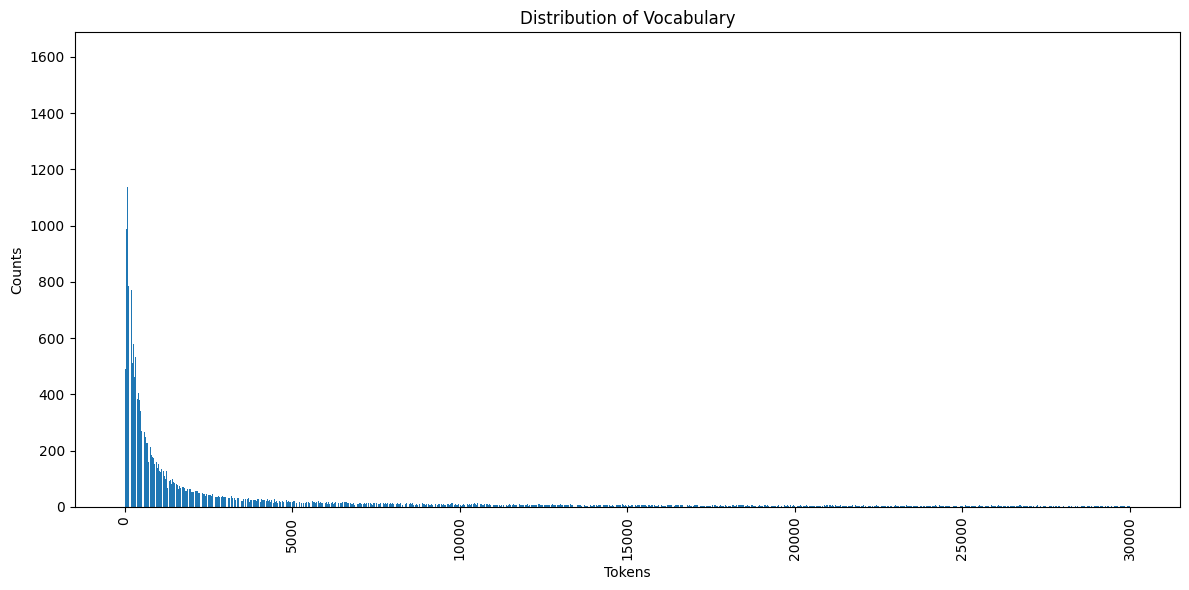

In [14]:
import matplotlib.pyplot as plt

# Your code to calculate sorted_vocab_count goes here...

# Convert the sorted_vocab_count dictionary into two lists: tokens and counts
tokens, counts = zip(*sorted_vocab_count.items())

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.bar(tokens, counts)
plt.xlabel("Tokens")
plt.ylabel("Counts")
plt.title("Distribution of Vocabulary")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [15]:
# Filter vocab_count to include items with at least 100 occurrences
min_occurrences = 100
filtered_vocab_count = {token: count for token, count in sorted_vocab_count_decoded.items() if count >= min_occurrences}


/tmp/ipykernel_30608/671189041.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


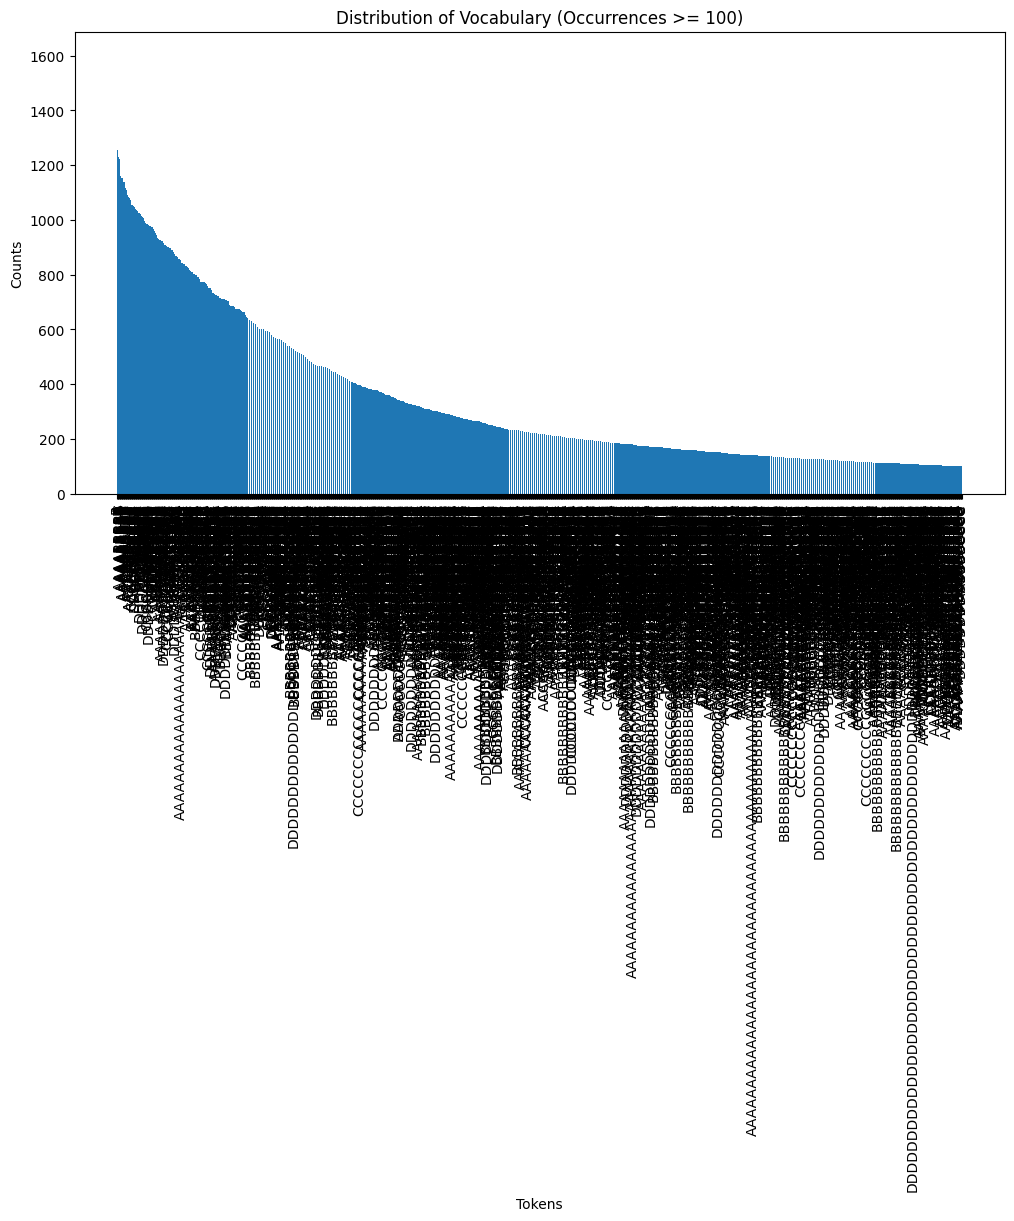

In [16]:
# Convert the filtered_vocab_count dictionary into two lists: tokens and counts
tokens, counts = zip(*filtered_vocab_count.items())

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.bar(tokens, counts)
plt.xlabel("Tokens")
plt.ylabel("Counts")
plt.title(f"Distribution of Vocabulary (Occurrences >= {min_occurrences})")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [17]:
print(f"filtered_vocab_count: {len(filtered_vocab_count)}")
print(f"vocab_count_decoded: {len(vocab_count_decoded)}")

aprox_words=round(len(filtered_vocab_count)*100/95)
print(f"recommended size vocab: {aprox_words}")

filtered_vocab_count: 1270
vocab_count_decoded: 28858
recommended size vocab: 1337


In [18]:
#whole dataset
#filtered_vocab_count: 1920
#vocab_count_decoded: 28952
#recommended size vocab: xxxx

